# CICIDS2018

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [83]:
data= pd.read_csv("cisdata5.csv")
data

,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,...,Pkt Len Std,URG Flag Cnt,Pkt Size Avg,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Mean,Label
0,0.000000,102.0,0.0,0.000000,8005.0,0.0,8005,8005,16,16,...,33.958799,0,81.0,2,204,-1,-1,8,0.0,Benign
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0,20,20,...,0.000000,1,0.0,1,0,513,255,20,0.0,Benign
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0,40,0,...,0.000000,0,0.0,0,0,279,-1,20,0.0,Benign
3,23.459184,0.0,0.0,158.391919,0.0,0.0,0,0,60,0,...,21.685248,0,41.0,0,0,258,-1,20,0.0,Benign
4,0.000000,100.0,0.0,0.000000,0.0,0.0,0,0,8,8,...,34.641016,0,90.0,1,100,-1,-1,8,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104852,0.000000,48.0,0.0,0.000000,0.0,0.0,0,0,8,8,...,9.237604,0,56.0,1,48,-1,-1,8,0.0,Benign
104853,0.000000,92.0,0.0,0.000000,0.0,0.0,0,0,8,8,...,27.712813,0,90.0,1,92,-1,-1,8,0.0,Benign
104854,0.000000,55.0,0.0,0.000000,0.0,0.0,0,0,8,8,...,9.237604,0,66.5,1,55,-1,-1,8,0.0,Benign
104855,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0,40,20,...,0.000000,0,0.0,1,0,26883,0,40,0.0,FTP-BruteForce


In [84]:
data.isna().sum()

Fwd Pkt Len Std      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Fwd IAT Std          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Header Len       0
Bwd Header Len       0
Bwd Pkts/s           0
Pkt Len Mean         0
Pkt Len Std          0
URG Flag Cnt         0
Pkt Size Avg         0
Subflow Bwd Pkts     0
Subflow Bwd Byts     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Mean            0
Label                0
dtype: int64

In [85]:
data

,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,...,Pkt Len Std,URG Flag Cnt,Pkt Size Avg,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Mean,Label
0,0.000000,102.0,0.0,0.000000,8005.0,0.0,8005,8005,16,16,...,33.958799,0,81.0,2,204,-1,-1,8,0.0,Benign
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0,20,20,...,0.000000,1,0.0,1,0,513,255,20,0.0,Benign
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0,40,0,...,0.000000,0,0.0,0,0,279,-1,20,0.0,Benign
3,23.459184,0.0,0.0,158.391919,0.0,0.0,0,0,60,0,...,21.685248,0,41.0,0,0,258,-1,20,0.0,Benign
4,0.000000,100.0,0.0,0.000000,0.0,0.0,0,0,8,8,...,34.641016,0,90.0,1,100,-1,-1,8,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104852,0.000000,48.0,0.0,0.000000,0.0,0.0,0,0,8,8,...,9.237604,0,56.0,1,48,-1,-1,8,0.0,Benign
104853,0.000000,92.0,0.0,0.000000,0.0,0.0,0,0,8,8,...,27.712813,0,90.0,1,92,-1,-1,8,0.0,Benign
104854,0.000000,55.0,0.0,0.000000,0.0,0.0,0,0,8,8,...,9.237604,0,66.5,1,55,-1,-1,8,0.0,Benign
104855,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0,40,20,...,0.000000,0,0.0,1,0,26883,0,40,0.0,FTP-BruteForce


In [86]:
data['Label'].unique()

array(['Benign', 'SSH-Bruteforce', 'FTP-BruteForce'], dtype=object)

In [87]:
data['Label']=data['Label'].apply(lambda x : 1 if x=='Benign' else 0)

<AxesSubplot:xlabel='Label', ylabel='count'>

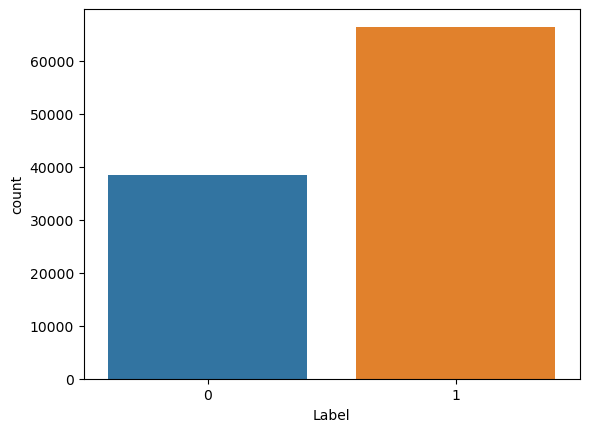

In [88]:
sns.countplot(x='Label',data=data)

In [89]:
data.columns

Index(['Fwd Pkt Len Std', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Fwd IAT Std',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Mean',
       'Pkt Len Std', 'URG Flag Cnt', 'Pkt Size Avg', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Seg Size Min', 'Idle Mean', 'Label'],
      dtype='object')

# DATA NORMALIZATION

In [90]:
cols_to_scale = ['Fwd Pkt Len Std', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Fwd IAT Std',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Mean',
       'Pkt Len Std', 'URG Flag Cnt', 'Pkt Size Avg', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Seg Size Min', 'Idle Mean']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [91]:
data

,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,...,Pkt Len Std,URG Flag Cnt,Pkt Size Avg,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Mean,Label
0,0.000000,0.069911,0.0,0.000000,0.000077,0.0,0.00007,0.000077,0.000119,0.000087,...,0.006277,0.0,0.034597,0.000218,0.000015,0.000000,0.000000,0.2,0.0,1
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000148,0.000109,...,0.000000,1.0,0.000000,0.000109,0.000000,0.007843,0.003906,0.5,0.0,1
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000297,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.004272,0.000000,0.5,0.0,1
3,0.003208,0.000000,0.0,0.000002,0.000000,0.0,0.00000,0.000000,0.000445,0.000000,...,0.004008,0.0,0.017512,0.000000,0.000000,0.003952,0.000000,0.5,0.0,1
4,0.000000,0.068541,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000059,0.000044,...,0.006403,0.0,0.038441,0.000109,0.000007,0.000000,0.000000,0.2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104852,0.000000,0.032899,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000059,0.000044,...,0.001708,0.0,0.023919,0.000109,0.000004,0.000000,0.000000,0.2,0.0,1
104853,0.000000,0.063057,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000059,0.000044,...,0.005123,0.0,0.038441,0.000109,0.000007,0.000000,0.000000,0.2,0.0,1
104854,0.000000,0.037697,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000059,0.000044,...,0.001708,0.0,0.028404,0.000109,0.000004,0.000000,0.000000,0.2,0.0,1
104855,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000297,0.000109,...,0.000000,0.0,0.000000,0.000109,0.000000,0.410217,0.000015,1.0,0.0,0


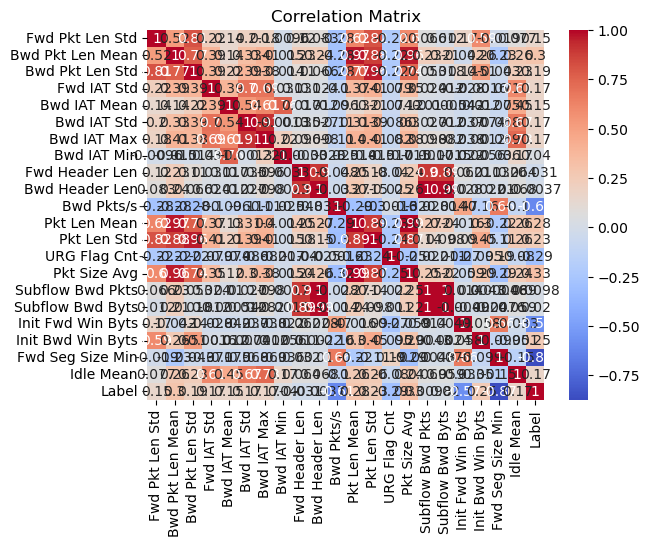

Correlated features:
Bwd Header Len
Bwd IAT Max
Bwd IAT Min
Bwd IAT Std
Bwd Pkt Len Mean
Bwd Pkt Len Std
Fwd Seg Size Min
Idle Mean
Init Bwd Win Byts
Label
Pkt Len Mean
Pkt Len Std
Pkt Size Avg
Subflow Bwd Byts
Subflow Bwd Pkts


In [92]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Set the correlation threshold
threshold = 0.5

# Find features with correlation above the threshold
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Print the correlated features
sorted_items = sorted(correlated_features)
print("Correlated features:")

for row in sorted_items:
    print(row)
    


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# splitting and training

In [94]:
y = data[['Label']]
X = data.drop(['Label', ], axis = 1)
  
sc = MinMaxScaler()
X = sc.fit_transform(X)
  
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(83885, 21) (20972, 21)
(83885, 1) (20972, 1)


# GRU

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import GRU, Dense

In [78]:
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for GRU
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert labels to categorical
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the GRU model
model = Sequential()
model.add(GRU(64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
656/656 [==============================] - 5s 4ms/step - loss: 0.1132 - accuracy: 0.9778 - val_loss: 0.0186 - val_accuracy: 0.9970
Epoch 2/10
656/656 [==============================] - 3s 4ms/step - loss: 0.0138 - accuracy: 0.9975 - val_loss: 0.0155 - val_accuracy: 0.9972
Epoch 3/10
656/656 [==============================] - 2s 4ms/step - loss: 0.0118 - accuracy: 0.9977 - val_loss: 0.0145 - val_accuracy: 0.9973
Epoch 4/10
656/656 [==============================] - 2s 4ms/step - loss: 0.0107 - accuracy: 0.9979 - val_loss: 0.0136 - val_accuracy: 0.9975
Epoch 5/10
656/656 [==============================] - 3s 4ms/step - loss: 0.0097 - accuracy: 0.9981 - val_loss: 0.0121 - val_accuracy: 0.9975
Epoch 6/10
656/656 [==============================] - 3s 5ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.0113 - val_accuracy: 0.9977
Epoch 7/10
656/656 [==============================] - 3s 4ms/step - loss: 0.0081 - accuracy: 0.9984 - val_loss: 0.0105 - val_accuracy: 0.9979
Epoch 

In [79]:
model.evaluate(X_test,y_test)

656/656 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9985


[0.009188794530928135, 0.9984741806983948]

# LSTM

In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Load the NSL-KDD dataset
# train_data = pd.read_csv('KDDTrain+.txt')
# test_data = pd.read_csv('KDDTest+.txt')

# # Combine train and test data for preprocessing
# data = pd.concat([train_data, test_data])

# Preprocessing
# Remove redundant features and normalize numerical features if needed
# ...

# Convert categorical labels to integers
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Split the data into features and labels
X = data.drop('Label', axis=1)
y = data['Label']

# Convert labels to one-hot encoded vectors
y = to_categorical(y)

# Pad sequences to the same length
X_padded = pad_sequences(X.values)

# Reshape features to fit the LSTM input shape
X_reshaped = X_padded.reshape((X_padded.shape[0], X_padded.shape[1], 1))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the LSTM model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/5
656/656 [==============================] - 32s 45ms/step - loss: 0.3855 - accuracy: 0.8564 - val_loss: 0.3581 - val_accuracy: 0.8739
Epoch 2/5
656/656 [==============================] - 29s 44ms/step - loss: 0.3467 - accuracy: 0.8760 - val_loss: 0.3515 - val_accuracy: 0.8739
Epoch 3/5
656/656 [==============================] - 31s 47ms/step - loss: 0.3449 - accuracy: 0.8770 - val_loss: 0.3466 - val_accuracy: 0.8753
Epoch 4/5
656/656 [==============================] - 36s 56ms/step - loss: 0.3434 - accuracy: 0.8777 - val_loss: 0.3498 - val_accuracy: 0.8753
Epoch 5/5
656/656 [==============================] - 6s 9ms/step - loss: 0.3463 - accuracy: 0.8754
Test Loss: 0.3463294208049774
Test Accuracy: 0.8753576278686523
